In [1]:
from datasets import load_dataset, DownloadMode

# First, download the dataset with caching
def download_starcoderdata_sql(save_directory, split="train", download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS):
    try:
        ds = load_dataset(
            "bigcode/starcoderdata",
            data_dir="sql",
            split=split,
            cache_dir=save_directory,
            download_mode=download_mode,
        )

        # Save the dataset properly for later reloading
        output_path = f"{save_directory}/sql_{split}_dataset"
        ds.save_to_disk(output_path)

        print(f"Dataset 'bigcode/starcoderdata' (SQL, {split}) successfully downloaded and saved to '{output_path}'.")
        return ds

    except Exception as e:
        print(f"Error downloading dataset 'bigcode/starcoderdata' (SQL, {split}): {e}")
        return None

In [2]:
ds = download_starcoderdata_sql(save_directory="./", split="train")

Loading dataset shards:   0%|          | 0/23 [00:00<?, ?it/s]

Saving the dataset (0/23 shards):   0%|          | 0/975420 [00:00<?, ? examples/s]

Dataset 'bigcode/starcoderdata' (SQL, train) successfully downloaded and saved to './/sql_train_dataset'.


In [3]:
from datasets import load_from_disk

# Later, load the dataset from the saved location
dataset = load_from_disk("./sql_train_dataset")

Loading dataset from disk:   0%|          | 0/23 [00:00<?, ?it/s]

In [4]:
dataset

Dataset({
    features: ['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id', 'content'],
    num_rows: 975420
})

In [5]:
type(dataset)

datasets.arrow_dataset.Dataset

In [6]:
print(dataset[0])

{'max_stars_repo_path': 'test/regexp_replace-test.sql', 'max_stars_repo_name': 'mindreframer/sqlean', 'max_stars_count': 0, 'id': '0', 'content': "<filename>test/regexp_replace-test.sql\n.read test/_settings.sql\n.load dist/re\nselect '01', regexp_replace('the year is 2021', '[0-9]+', '2050') = 'the year is 2050';\nselect '02', regexp_replace('the year is 2021', '2k21', '2050') = 'the year is 2021';\nselect '03', regexp_replace('10 10 10', '10$', '') = '10 10 ';\nselect '04', regexp_replace('10 10 10', '^10', '') = ' 10 10';\nselect '05', regexp_replace('hello', 'h', '') = 'ello';\nselect '06', regexp_replace('hello', 'h', '.') = '.ello';\nselect '07', regexp_replace('hello', 'h', '..') = '..ello';\nselect '08', regexp_replace('hello', 'e', '') = 'hllo';\nselect '09', regexp_replace('hello', 'e', '.') = 'h.llo';\nselect '10', regexp_replace('hello', 'e', '..') = 'h..llo';\nselect '11', regexp_replace('hello', 'o', '') = 'hell';\nselect '12', regexp_replace('hello', 'o', '.') = 'hell.';

In [7]:
# Print the first 10 examples
for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print("\n")
    else:
        break

Example 0:
<filename>test/regexp_replace-test.sql
.read test/_settings.sql
.load dist/re
select '01', regexp_replace('the year is 2021', '[0-9]+', '2050') = 'the year is 2050';
select '02', regexp_replace('the year is 2021', '2k21', '2050') = 'the year is 2021';
select '03', regexp_replace('10 10 10', '10$', '') = '10 10 ';
select '04', regexp_replace('10 10 10', '^10', '') = ' 10 10';
select '05', regexp_replace('hello', 'h', '') = 'ello';
select '06', regexp_replace('hello', 'h', '.') = '.ello';
select '07', regexp_replace('hello', 'h', '..') = '..ello';
select '08', regexp_replace('hello', 'e', '') = 'hllo';
select '09', regexp_replace('hello', 'e', '.') = 'h.llo';
select '10', regexp_replace('hello', 'e', '..') = 'h..llo';
select '11', regexp_replace('hello', 'o', '') = 'hell';
select '12', regexp_replace('hello', 'o', '.') = 'hell.';
select '13', regexp_replace('hello', 'o', '..') = 'hell..';



Example 1:
ALTER TABLE kooste.tamperewfs_luontorastit DROP CONSTRAINT tamperewfs_luont

In [8]:
from datasets import Dataset

def calculate_avg_line_length(example):
    lines = example['content'].split('\n')
    avg_length = sum(len(line) for line in lines) / len(lines)
    example['avg_line_length'] = avg_length
    return example

dataset = dataset.map(calculate_avg_line_length)

for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print(f"Average Line Length: {example['avg_line_length']}\n")
    else:
        break

Map:   0%|          | 0/975420 [00:00<?, ? examples/s]

Example 0:
<filename>test/regexp_replace-test.sql
.read test/_settings.sql
.load dist/re
select '01', regexp_replace('the year is 2021', '[0-9]+', '2050') = 'the year is 2050';
select '02', regexp_replace('the year is 2021', '2k21', '2050') = 'the year is 2021';
select '03', regexp_replace('10 10 10', '10$', '') = '10 10 ';
select '04', regexp_replace('10 10 10', '^10', '') = ' 10 10';
select '05', regexp_replace('hello', 'h', '') = 'ello';
select '06', regexp_replace('hello', 'h', '.') = '.ello';
select '07', regexp_replace('hello', 'h', '..') = '..ello';
select '08', regexp_replace('hello', 'e', '') = 'hllo';
select '09', regexp_replace('hello', 'e', '.') = 'h.llo';
select '10', regexp_replace('hello', 'e', '..') = 'h..llo';
select '11', regexp_replace('hello', 'o', '') = 'hell';
select '12', regexp_replace('hello', 'o', '.') = 'hell.';
select '13', regexp_replace('hello', 'o', '..') = 'hell..';

Average Line Length: 52.0

Example 1:
ALTER TABLE kooste.tamperewfs_luontorastit DROP CO

In [9]:
import pandas as pd

df = pd.DataFrame(dataset)

In [10]:
avg_line_length_stats = df['avg_line_length'].describe()
print("Statistics for avg_line_length:")
print(avg_line_length_stats)

Statistics for avg_line_length:
count    975420.000000
mean         69.856997
std        1635.003799
min           0.615385
25%          24.375000
50%          31.892857
75%          44.398405
max      610215.000000
Name: avg_line_length, dtype: float64


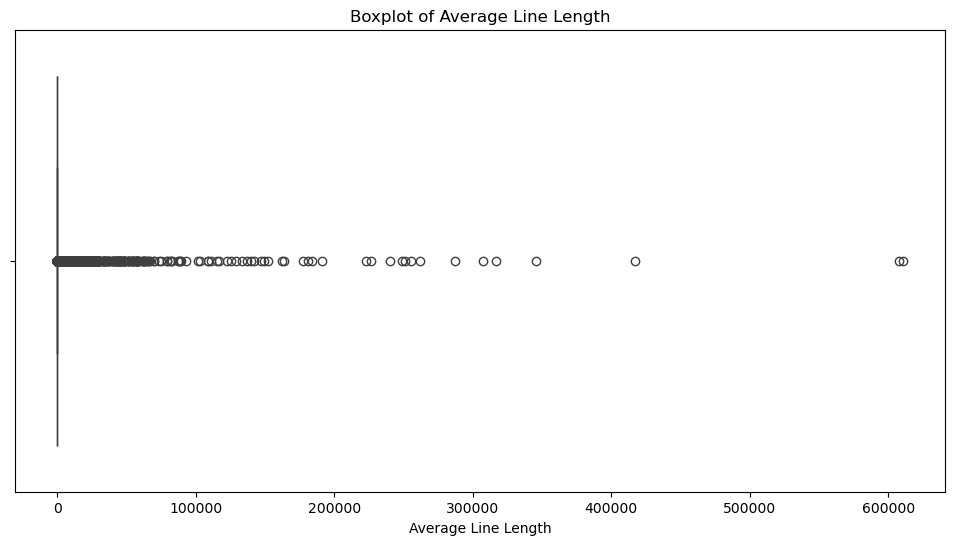

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['avg_line_length'])
plt.title('Boxplot of Average Line Length')
plt.xlabel('Average Line Length')
plt.show()

In [12]:
Q1 = df['avg_line_length'].quantile(0.25)
Q3 = df['avg_line_length'].quantile(0.75)
IQR = Q3 - Q1


In [13]:
outliers = df[(df['avg_line_length'] < (Q1 - 1.5 * IQR)) | (df['avg_line_length'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 90377


In [14]:
outliers['avg_line_length'].describe()

count     90377.000000
mean        431.852830
std        5357.789811
min          74.434211
25%          87.567251
50%         111.983471
75%         183.875000
max      610215.000000
Name: avg_line_length, dtype: float64

In [15]:
df.drop(outliers.index, inplace=True)

In [16]:
df['avg_line_length'].describe()

count    885043.000000
mean         32.891452
std          12.959600
min           0.615385
25%          23.696970
50%          30.368421
75%          39.653878
max          74.432836
Name: avg_line_length, dtype: float64

In [17]:
import numpy as np

np.percentile(df['avg_line_length'], 80)

42.52545099286591

In [18]:
df['line_count'] = df['content'].apply(lambda x: len(x.split('\n')))
df['line_count'].describe()

count    885043.000000
mean        139.164878
std         828.887878
min           1.000000
25%           9.000000
50%          23.000000
75%          73.000000
max       84454.000000
Name: line_count, dtype: float64

In [19]:
count_range_dict = {
    "0-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0,
    "501-600": 0,
    "601-700": 0,
    "701-800": 0,
    "801-900": 0,
    "901-1000": 0,
    "1000+": 0
}

for count in df['line_count']:
    if count <= 100:
        count_range_dict["0-100"] += 1
    elif count <= 200:
        count_range_dict["101-200"] += 1
    elif count <= 300:
        count_range_dict["201-300"] += 1
    elif count <= 400:
        count_range_dict["301-400"] += 1
    elif count <= 500:
        count_range_dict["401-500"] += 1
    elif count <= 600:
        count_range_dict["501-600"] += 1
    elif count <= 700:
        count_range_dict["601-700"] += 1
    elif count <= 800:
        count_range_dict["701-800"] += 1
    elif count <= 900:
        count_range_dict["801-900"] += 1
    elif count <= 1000:
        count_range_dict["901-1000"] += 1
    else:
        count_range_dict["1000+"] += 1

In [20]:
for key, value in count_range_dict.items():
    print(f"Number of examples with line count in range {key}: {value}")

Number of examples with line count in range 0-100: 707315
Number of examples with line count in range 101-200: 75133
Number of examples with line count in range 201-300: 34274
Number of examples with line count in range 301-400: 18895
Number of examples with line count in range 401-500: 11603
Number of examples with line count in range 501-600: 7546
Number of examples with line count in range 601-700: 5084
Number of examples with line count in range 701-800: 3626
Number of examples with line count in range 801-900: 2717
Number of examples with line count in range 901-1000: 2344
Number of examples with line count in range 1000+: 16506


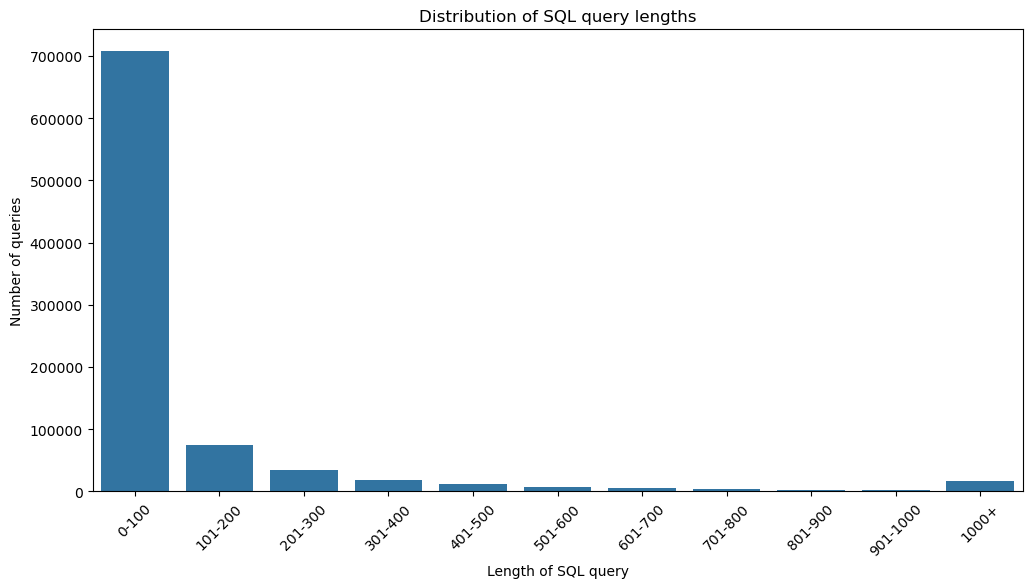

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_range_dict.keys()), y=list(count_range_dict.values()))
plt.title("Distribution of SQL query lengths")
plt.xlabel("Length of SQL query")
plt.ylabel("Number of queries")
plt.xticks(rotation=45)
plt.show()

In [22]:
df_line = pd.DataFrame(list(count_range_dict.items()), columns=["Length", "Count"])
df_line["Cumulative Count"] = df_line["Count"].cumsum()
df_line["Percentage"] = df_line["Count"] / df_line["Count"].sum() * 100
df_line["Cumulative Percentage"] = df_line["Percentage"].cumsum()
df_line.head(11)

,Length,Count,Cumulative Count,Percentage,Cumulative Percentage
0,0-100,707315,707315,79.918716,79.918716
1,101-200,75133,782448,8.489192,88.407908
2,201-300,34274,816722,3.872580,92.280488
3,301-400,18895,835617,2.134925,94.415413
4,401-500,11603,847220,1.311010,95.726422
5,501-600,7546,854766,0.852614,96.579036
6,601-700,5084,859850,0.574435,97.153472
7,701-800,3626,863476,0.409698,97.563169
8,801-900,2717,866193,0.306991,97.870160
9,901-1000,2344,868537,0.264846,98.135006


In [23]:
np.percentile(df['line_count'], 90)

235.0

In [24]:
df.columns

Index(['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id',
       'content', 'avg_line_length', 'line_count'],
      dtype='object')

In [25]:
df_filtered = df.drop(columns=['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id'], axis=1)
df_filtered.head()

,content,avg_line_length,line_count
0,<filename>test/regexp_replace-test.sql\n.read ...,52.000000,17
1,ALTER TABLE kooste.tamperewfs_luontorastit DRO...,63.000000,7
2,<reponame>Dragontalker/MySQL-study-notes\n#视图\...,12.385027,187
4,<filename>sure(4).sql\n-- phpMyAdmin SQL Dump\...,33.842784,388
5,<reponame>wahyu-ramadhan69/sistem_informasi_pe...,38.261780,191


In [26]:
df_filtered.shape

(885043, 3)

In [27]:
df_filtered = df_filtered[df_filtered['line_count'] <= 235]
df_filtered.shape

(796743, 3)

In [28]:
df_filtered = df_filtered[df_filtered['avg_line_length'] <= 42.5]
df_filtered.shape

(646195, 3)

In [29]:
df_filtered.head()

,content,avg_line_length,line_count
2,<reponame>Dragontalker/MySQL-study-notes\n#视图\...,12.385027,187
5,<reponame>wahyu-ramadhan69/sistem_informasi_pe...,38.261780,191
8,-- phpMyAdmin SQL Dump\n-- version 4.8.0\n-- h...,24.229299,157
9,"CREATE TABLE payload (name text, value blob)\n...",41.666667,3
14,<filename>sql-file.sql\nCREATE DATABASE IF NOT...,26.333333,15


In [30]:
print(df[["avg_line_length", "line_count"]].describe())
print()
print(df_filtered.describe())

       avg_line_length     line_count
count    885043.000000  885043.000000
mean         32.891452     139.164878
std          12.959600     828.887878
min           0.615385       1.000000
25%          23.696970       9.000000
50%          30.368421      23.000000
75%          39.653878      73.000000
max          74.432836   84454.000000

       avg_line_length     line_count
count    646195.000000  646195.000000
mean         27.427615      39.310832
std           7.624172      47.688032
min           0.615385       1.000000
25%          22.000000       8.000000
50%          27.267606      20.000000
75%          33.159420      50.000000
max          42.500000     235.000000


In [31]:
data_dict_sql = {}

for i, example in enumerate(df_filtered["content"]):
    data_dict_sql[f"sql_{i}"] = example

In [32]:
assert len(data_dict_sql) == len(df_filtered), "Data dictionary length does not match the number of examples in the dataset."

In [33]:
for i, (k,v) in enumerate(data_dict_sql.items()):
    if i < 5:
        print(f"Example {k}:")
        print(v)
        print("\n")
    else:
        break

Example sql_0:
<reponame>Dragontalker/MySQL-study-notes
#视图

/*
含义: 虚拟表, 和普通表一样使用
mysql5.1版本出现的新特性, 是通过表动态生成的数据

比如: 舞蹈班和普通班的对比

		创建语法的关键字	是否实际占用物理空间		使用
视图		create table	 只保存了sql逻辑		增删改查, 一般不能增删改
表		create view		   保准了数据ALTER	增删改查
*/

#案例: 查询姓张的学生名和专业名
SELECT stuname, major_name
FROM stuinfo AS s
INNER JOIN major AS m 
ON s.major_id = m.id
WHERE s.stuname LIKE '%张';

#创建视图
CREATE VIEW v1
AS
SELECT stuname, major_name
FROM stuinfo AS s
INNER JOIN major AS m
ON s.major_id = m.id;

#使用视图
SELECT * FROM v1 WHERE s.stuname LIKE '%张';

#一、创建视图
/*
语法:
create view 视图名
as
查询语句;
*/

#1. 查询姓名中包含a字符的员工名、部门名和工种新消息
#(1)创建
CREATE VIEW myv1
AS
SELECT last_name, department_name, job_title
FROM employees AS e
JOIN departments AS d
ON e.department_id = d.department_id
JOIN jobs AS j
ON j.job_id = e.job_id;

#(2)使用
SELECT *
FROM myv1
WHERE last_name LIKE '%a%';

#2. 查询各部门的平均工资级别
#(1)创建视图查看每个部门的平均工资
CREATE VIEW myv2
AS
SELECT AVG(salary) AS ag, department_id
FROM employees
GROUP BY department_id;

#(2)使用


In [34]:
import json

with open('sql_train.json', 'w') as f:
    json.dump(data_dict_sql, f)
    print("Saved to 'sql_train.json'")

Saved to 'sql_train.json'
